# Phenotype data summary and transformation

Here I evaluate quantitative phenotypes for normality, and explore various transformation approaches by looking at distribution of quantitative traits, qq-plots, standadization and inverse rank normalization.

## Motivation

## Approaches

## Implementation details

I made a copy of the file `UKB_caucasians_BMIwaisthip_AsthmaAndT2D_withagesex_033120` to my local directory `/home/dc2325/phenotypes_UKB`.

Below are R codes to analyze the quantitate phenotypes from UK Biobank data. The goal is to import dataframes, make simple figures and plot data. Besides the data will be inverse rank normalized using another R script avalaible online.

### Packages and libraries

In [ ]:
install.packages("ggplot2")
install.packages("pastecs")
install.packages("dplyr")
install.packages("moments")
install.packages("tidyverse")
install.packages("gridExtra")
install.packages("ggpubr")
install.packages("RNOmni")

In [3]:
library(pastecs)
library(dplyr)
library(moments)
library(tidyverse)
library(ggplot2)
library(gridExtra)
library(ggpubr)
library(RNOmni)

In [4]:
setwd('/home/gw/GIT/github/pleiotropy_UKB/data/phenotypes')

### Analysis and results

In [5]:
# Clean any existing variables for safety
rm(list=ls())

# set the working directory
setwd("~/pleiotropy_UKB/data/phenotypes")

In [7]:
# read a space delimited file
df <- read.table("UKB_caucasians_BMIwaisthip_AsthmaAndT2D_withagesex_033120", header=T,
                   sep = " ", dec = ".")

# list the first 5 and list 5 rows of the data
head(df,5) 
tail(df,5)

,FID,IID,AGE,SEX,ASTHMA,T2D,BMI,WAIST,HIP
,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,1000019,1000019,47,0,1,0,32.4868,96,110
2,1000022,1000022,53,1,0,0,28.5292,102,111
3,1000035,1000035,63,1,0,0,26.1551,94,102
4,1000046,1000046,62,0,0,0,29.4740,93,98
5,1000054,1000054,65,0,0,0,30.2294,103,109


,FID,IID,AGE,SEX,ASTHMA,T2D,BMI,WAIST,HIP
,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
361550,6025354,6025354,52,0,0,0,25.8031,77,104
361551,6025363,6025363,64,1,0,0,25.5428,91,94
361552,6025409,6025409,61,0,0,0,29.2446,94,110
361553,6025411,6025411,49,0,0,0,24.0159,77,101
361554,6025425,6025425,44,0,0,0,25.2826,84,100


In [9]:
# summary of contents
str(df) 

'data.frame':	361554 obs. of  9 variables:
 $ FID   : int  1000019 1000022 1000035 1000046 1000054 1000063 1000078 1000105 1000112 1000129 ...
 $ IID   : int  1000019 1000022 1000035 1000046 1000054 1000063 1000078 1000105 1000112 1000129 ...
 $ AGE   : int  47 53 63 62 65 43 52 54 58 62 ...
 $ SEX   : int  0 1 1 0 0 1 0 0 1 1 ...
 $ ASTHMA: int  1 0 0 0 0 0 0 0 0 0 ...
 $ T2D   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ BMI   : num  32.5 28.5 26.2 29.5 30.2 ...
 $ WAIST : num  96 102 94 93 103 83 80 71 112 97 ...
 $ HIP   : num  110 111 102 98 109 100 109 93 110 105 ...


In [10]:
#another way to view the data
glimpse(df)

Rows: 361,554
Columns: 9
$ FID    <int> 1000019, 1000022, 1000035, 1000046, 1000054, 1000063, 1000078,…
$ IID    <int> 1000019, 1000022, 1000035, 1000046, 1000054, 1000063, 1000078,…
$ AGE    <int> 47, 53, 63, 62, 65, 43, 52, 54, 58, 62, 46, 49, 51, 51, 53, 41…
$ SEX    <int> 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,…
$ ASTHMA <int> 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,…
$ T2D    <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,…
$ BMI    <dbl> 32.4868, 28.5292, 26.1551, 29.4740, 30.2294, 24.8432, 26.3960,…
$ WAIST  <dbl> 96.0, 102.0, 94.0, 93.0, 103.0, 83.0, 80.0, 71.0, 112.0, 97.0,…
$ HIP    <dbl> 110, 111, 102, 98, 109, 100, 109, 93, 110, 105, 88, 110, 96, 9…


In [11]:
# to make sure the data is a data frame
class(df)

[1] "data.frame"

In [13]:
# check for missing values in each variable
any(is.na(df$BMI))

[1] TRUE

In [14]:
colSums(is.na(df))

FID    IID    AGE    SEX ASTHMA    T2D    BMI  WAIST    HIP 
     0      0      0      0      0      0   1102    566    608

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 2 rows containing missing values (geom_bar).”


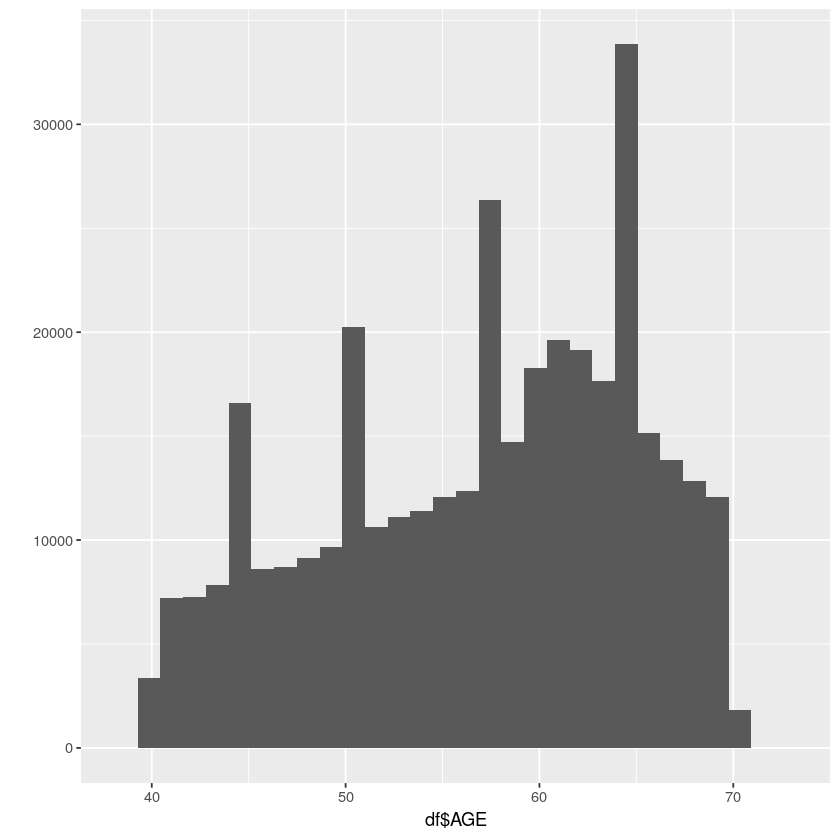

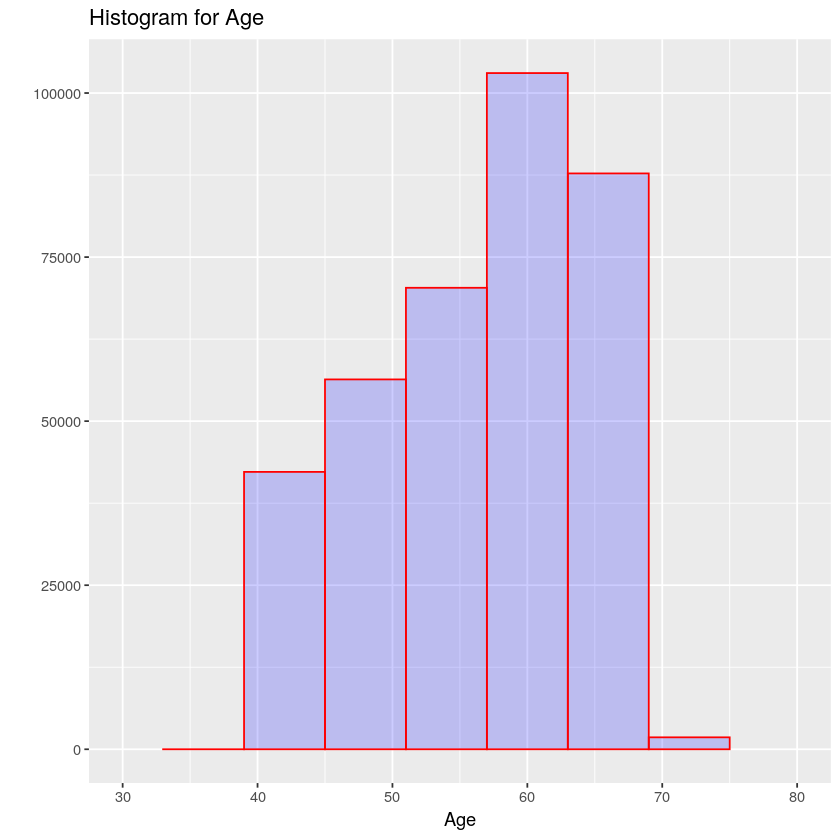

In [15]:
# Is a quick plot and allows less customization
qplot(df$AGE, geom="histogram")
qplot(df$AGE,
      geom="histogram",
      binwidth = 6,  
      main = "Histogram for Age", 
      xlab = "Age",  
      fill=I("blue"), 
      col=I("red"), 
      alpha=I(.2),
      xlim=c(30,80))

Warning message:
“Computation failed in `stat_bin()`:
invalid number of intervals”


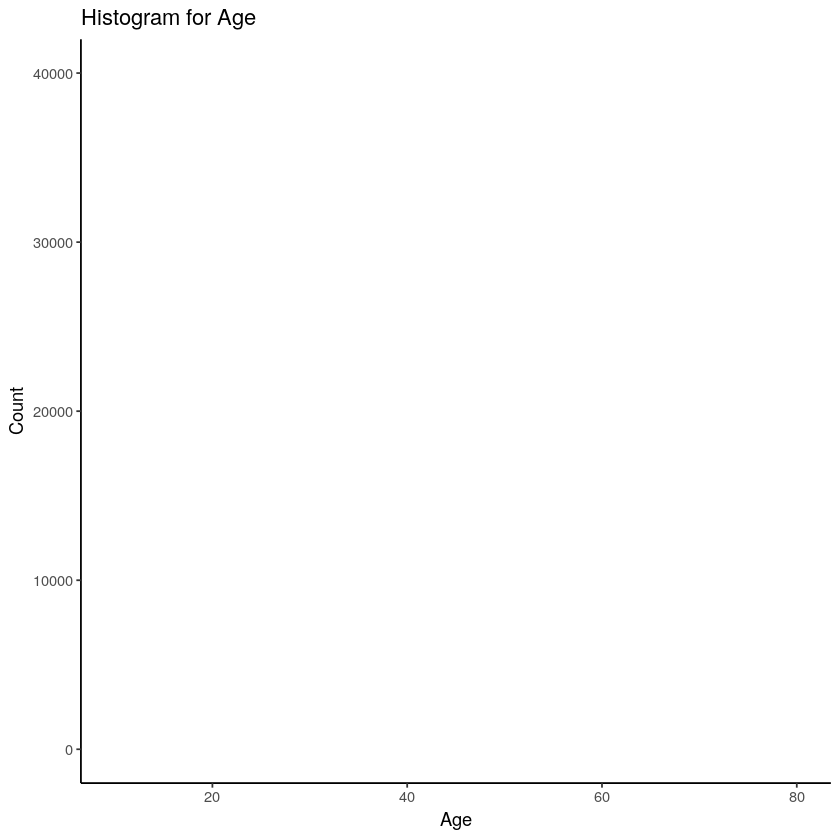

In [16]:
# Make an histogram using ggplot2 for the quantitative traits in UKB
# BMI, waist circumference, hip circumference, and waist to hip ratio
ggplot(df, aes(x=AGE)) + 
  geom_histogram(aes(y=..density..), breaks=seq(0, 1, by=2), 
                 col="black", 
                 fill="white", 
                 alpha = .2) + 
  labs(title="Histogram for Age", x="Age", y="Count") + 
  xlim(c(10,80)) + 
  ylim(c(0,40000)) + 
  theme_classic()

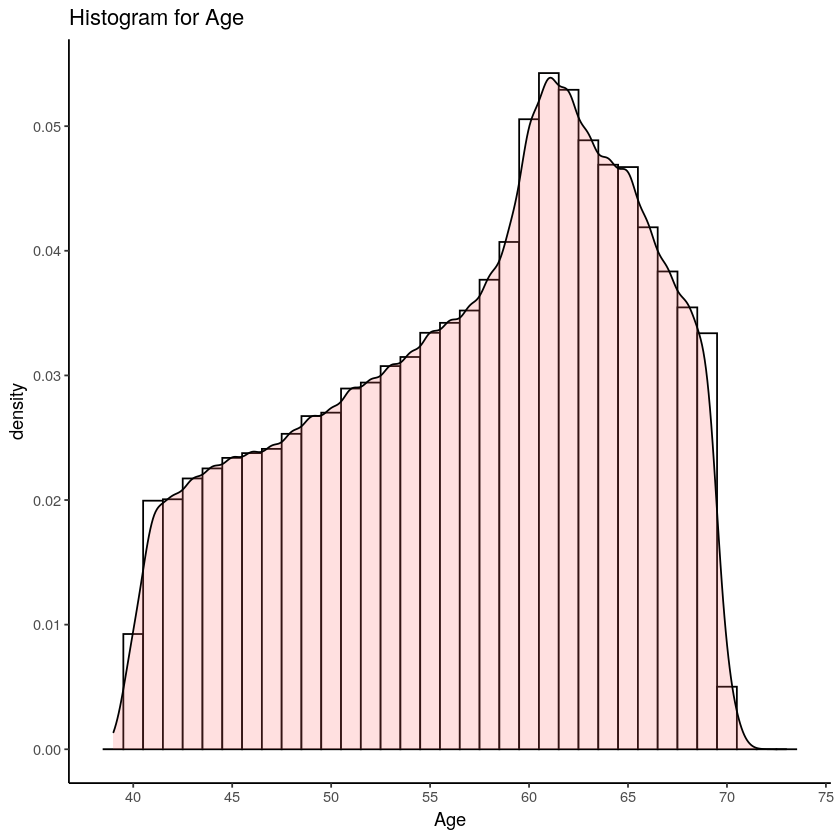

In [17]:
age_plot_density = ggplot(df, aes(x=AGE)) + 
  geom_histogram(aes(y=..density..), binwidth=1, color="black", fill="white")+
  geom_density(alpha=.2, fill="#FF6666") +
  scale_color_grey() + scale_fill_grey() +
  labs(title="Histogram for Age", x="Age") + 
  scale_x_continuous(breaks=seq(30,75,5)) +
  scale_y_continuous(breaks=seq(0,0.06,0.01)) +
  theme_classic()
age_plot_density

Warning message:
“Removed 1102 rows containing non-finite values (stat_bin).”


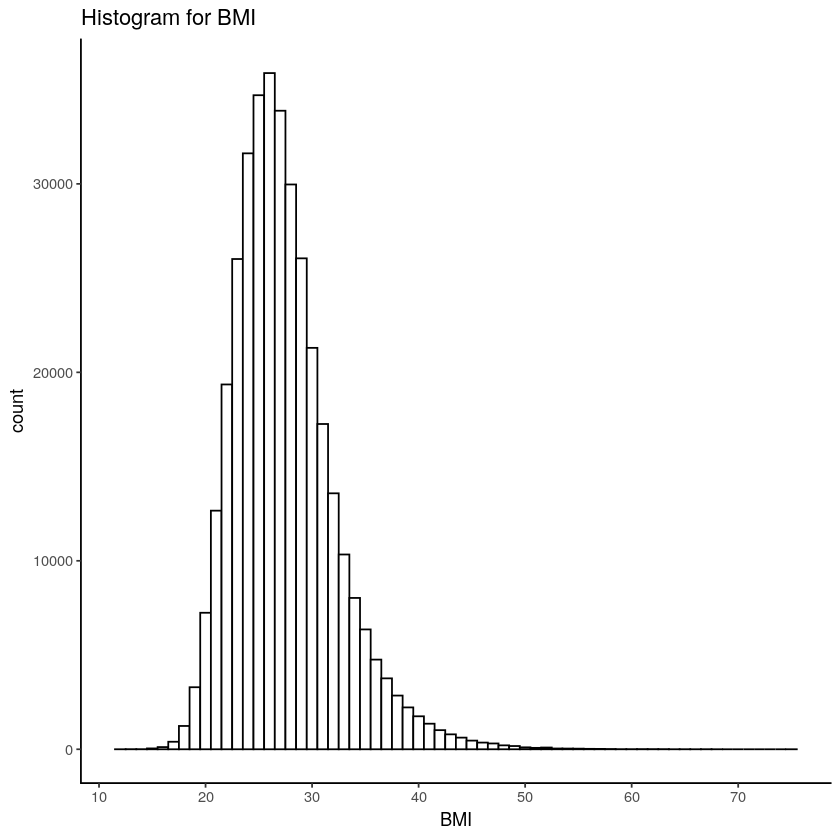

In [18]:
bmi_plot_count = ggplot(df, aes(x=BMI)) + 
  geom_histogram(aes(y=..count..), binwidth=1, color="black", fill="white")+
  scale_color_grey() + scale_fill_grey() +
  scale_x_continuous(breaks=seq(10,70,10)) +
  scale_y_continuous(breaks=seq(0,40000,10000)) +
  labs(title="Histogram for BMI", x="BMI") +
  theme_classic()
bmi_plot_count + theme(axis.line = element_line(colour="black", size=0.5, lineend="round"))

Warning message:
“Removed 1102 rows containing non-finite values (stat_bin).”


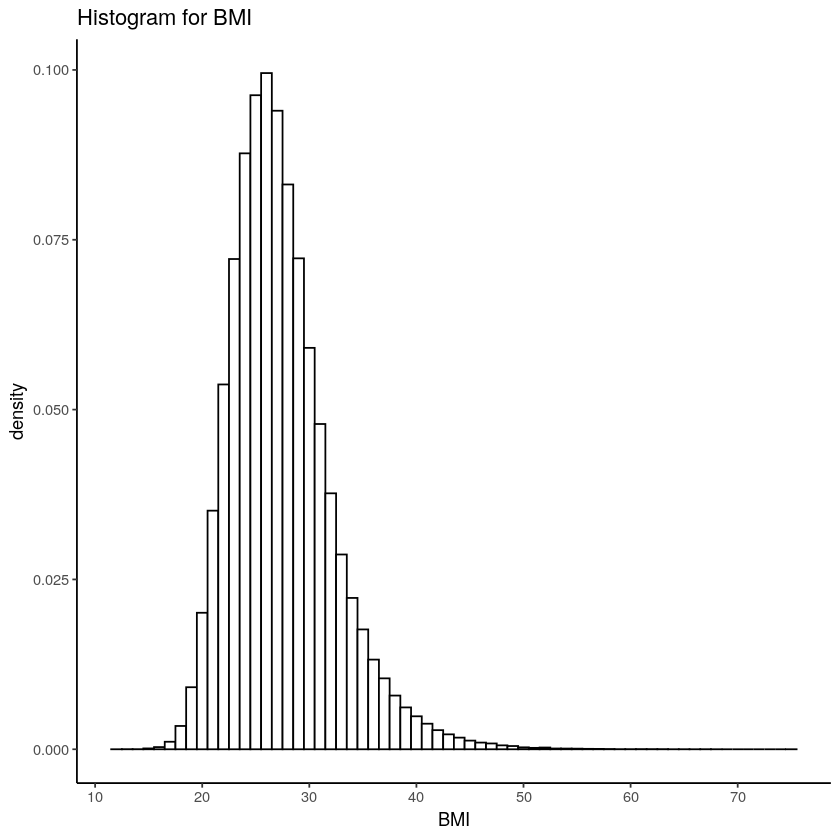

In [19]:
bmi_plot_density = ggplot(df, aes(x=BMI)) + 
  geom_histogram(aes(y=..density..), binwidth=1, color="black", fill="white")+
  scale_color_grey() + scale_fill_grey() +
  scale_x_continuous(breaks=seq(10,70,10))  +
  labs(title="Histogram for BMI", x="BMI") +
  theme_classic()
bmi_plot_density

Warning message:
“Removed 566 rows containing non-finite values (stat_bin).”


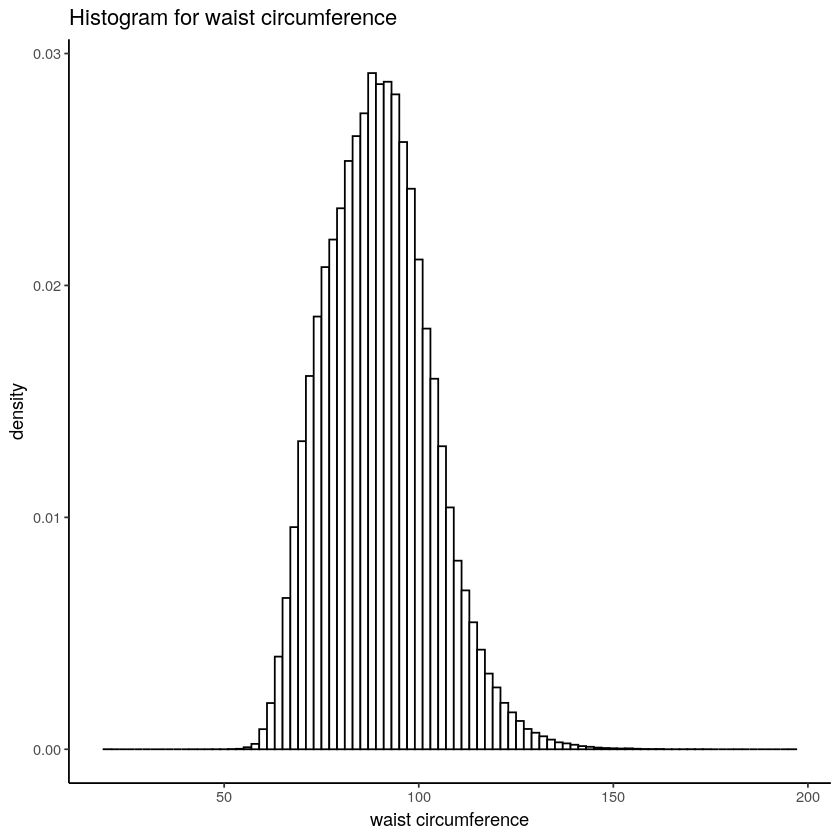

In [20]:
waist_plot_density = ggplot(df, aes(x=WAIST)) + 
  geom_histogram(aes(y=..density..), binwidth=2, color="black", fill="white")+
  scale_color_grey() + scale_fill_grey() +
  scale_x_continuous(breaks=seq(50,200,50)) +
  labs(title="Histogram for waist circumference", x="waist circumference") +
  theme_classic()
waist_plot_density

Warning message:
“Removed 608 rows containing non-finite values (stat_bin).”


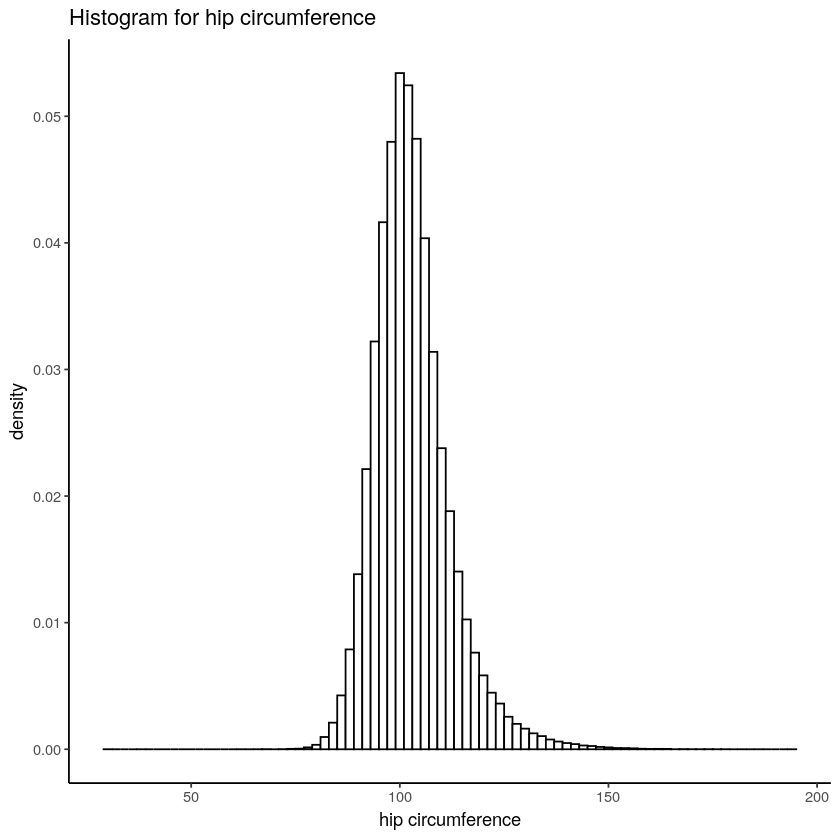

In [21]:
hip_plot_density = ggplot(df, aes(x=HIP)) + 
  geom_histogram(aes(y=..density..), binwidth=2, color="black", fill="white")+
  scale_color_grey() + scale_fill_grey() +
  scale_x_continuous(breaks=seq(50,200,50)) +
  scale_y_continuous(breaks=seq(0,0.05,0.01)) +
  labs(title="Histogram for hip circumference", x="hip circumference") +
  theme_classic()
hip_plot_density

Warning message:
“Removed 636 rows containing non-finite values (stat_bin).”


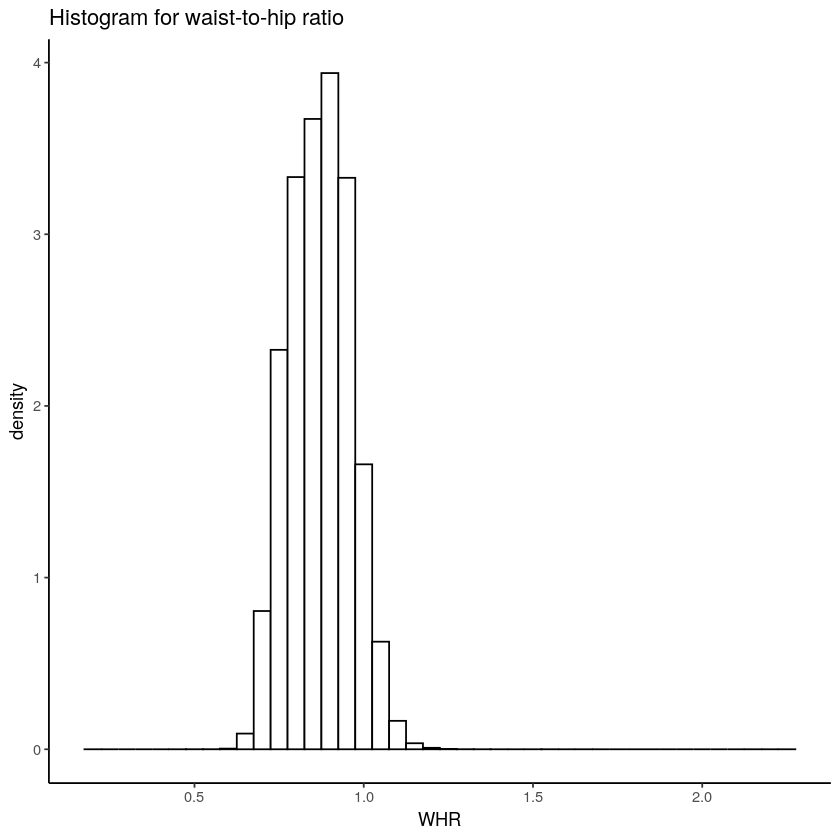

In [22]:
# Append new variable to dataframe here waist to hip ratio

WHR = (df$WAIST/df$HIP)
df$WHR = WHR

whr_plot_density = ggplot(df, aes(x=WHR)) + 
  geom_histogram(aes(y=..density..), binwidth = 0.05, color="black", fill="white")+
  scale_color_grey() + scale_fill_grey() +
  labs(title="Histogram for waist-to-hip ratio", x="WHR") +
  theme_classic()
whr_plot_density

Warning message:
“Removed 1102 rows containing non-finite values (stat_qq).”


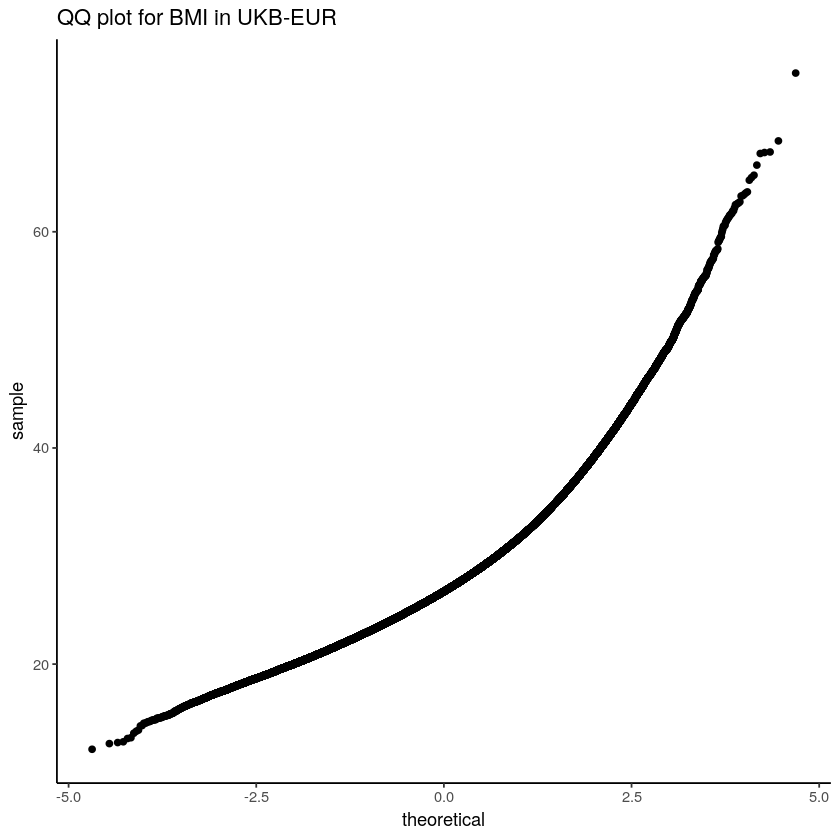

In [23]:
# Drawing qqplots with ggplot2

ggplot(df,aes(sample=BMI)) + 
  stat_qq() +
  labs(title="QQ plot for BMI in UKB-EUR")+
  theme_classic()

Warning message:
“Removed 566 rows containing non-finite values (stat_qq).”


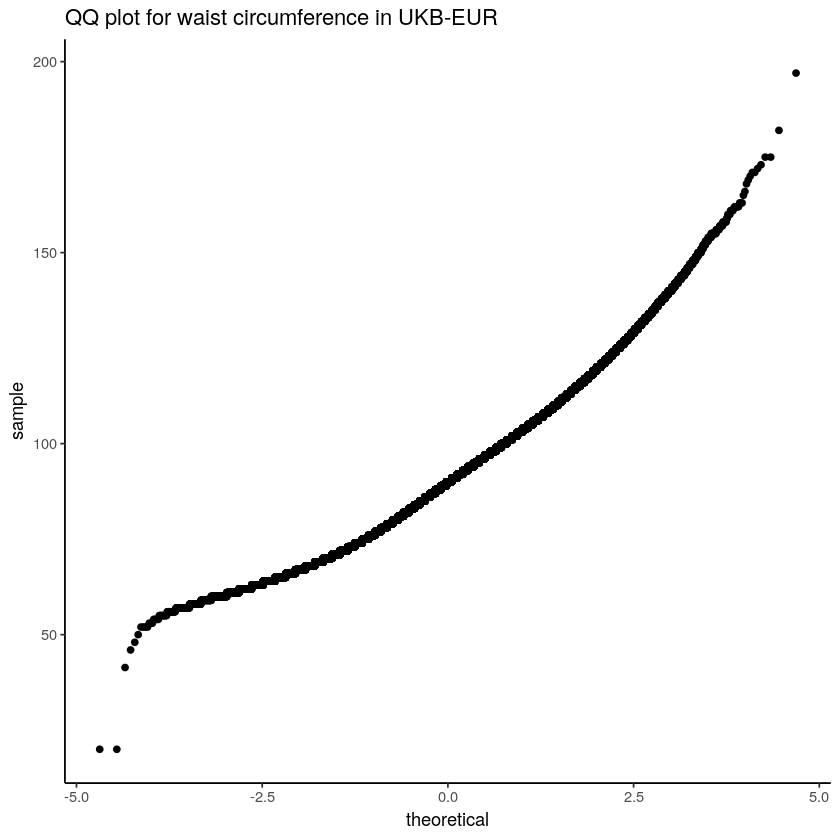

In [24]:
ggplot(df,aes(sample=WAIST)) + 
  stat_qq() +
  labs(title="QQ plot for waist circumference in UKB-EUR")+
  theme_classic()

In [44]:
# Drawing qqplots with ggpubr

bmi_qqplot = ggqqplot(df$BMI, title="QQ plot BMI UKB Caucasian")
png("QQplot_BMI_UKB_Caucasian.png", width = 6, height = 4, unit="in", res=300)
print(bmi_qqplot)
dev.off()

Warning message:
“Removed 1102 rows containing non-finite values (stat_qq).”
Warning message:
“Removed 1102 rows containing non-finite values (stat_qq_line).”
Warning message:
“Removed 1102 rows containing non-finite values (stat_qq_line).”


png 
  2

In [32]:
%cd /home/gw/GIT/github/pleiotropy_UKB/data/phenotypes

/home/gw/GIT/github/pleiotropy_UKB/data/phenotypes

> QQplot_BMI_UKB_Caucasian.png (35.1 KiB):

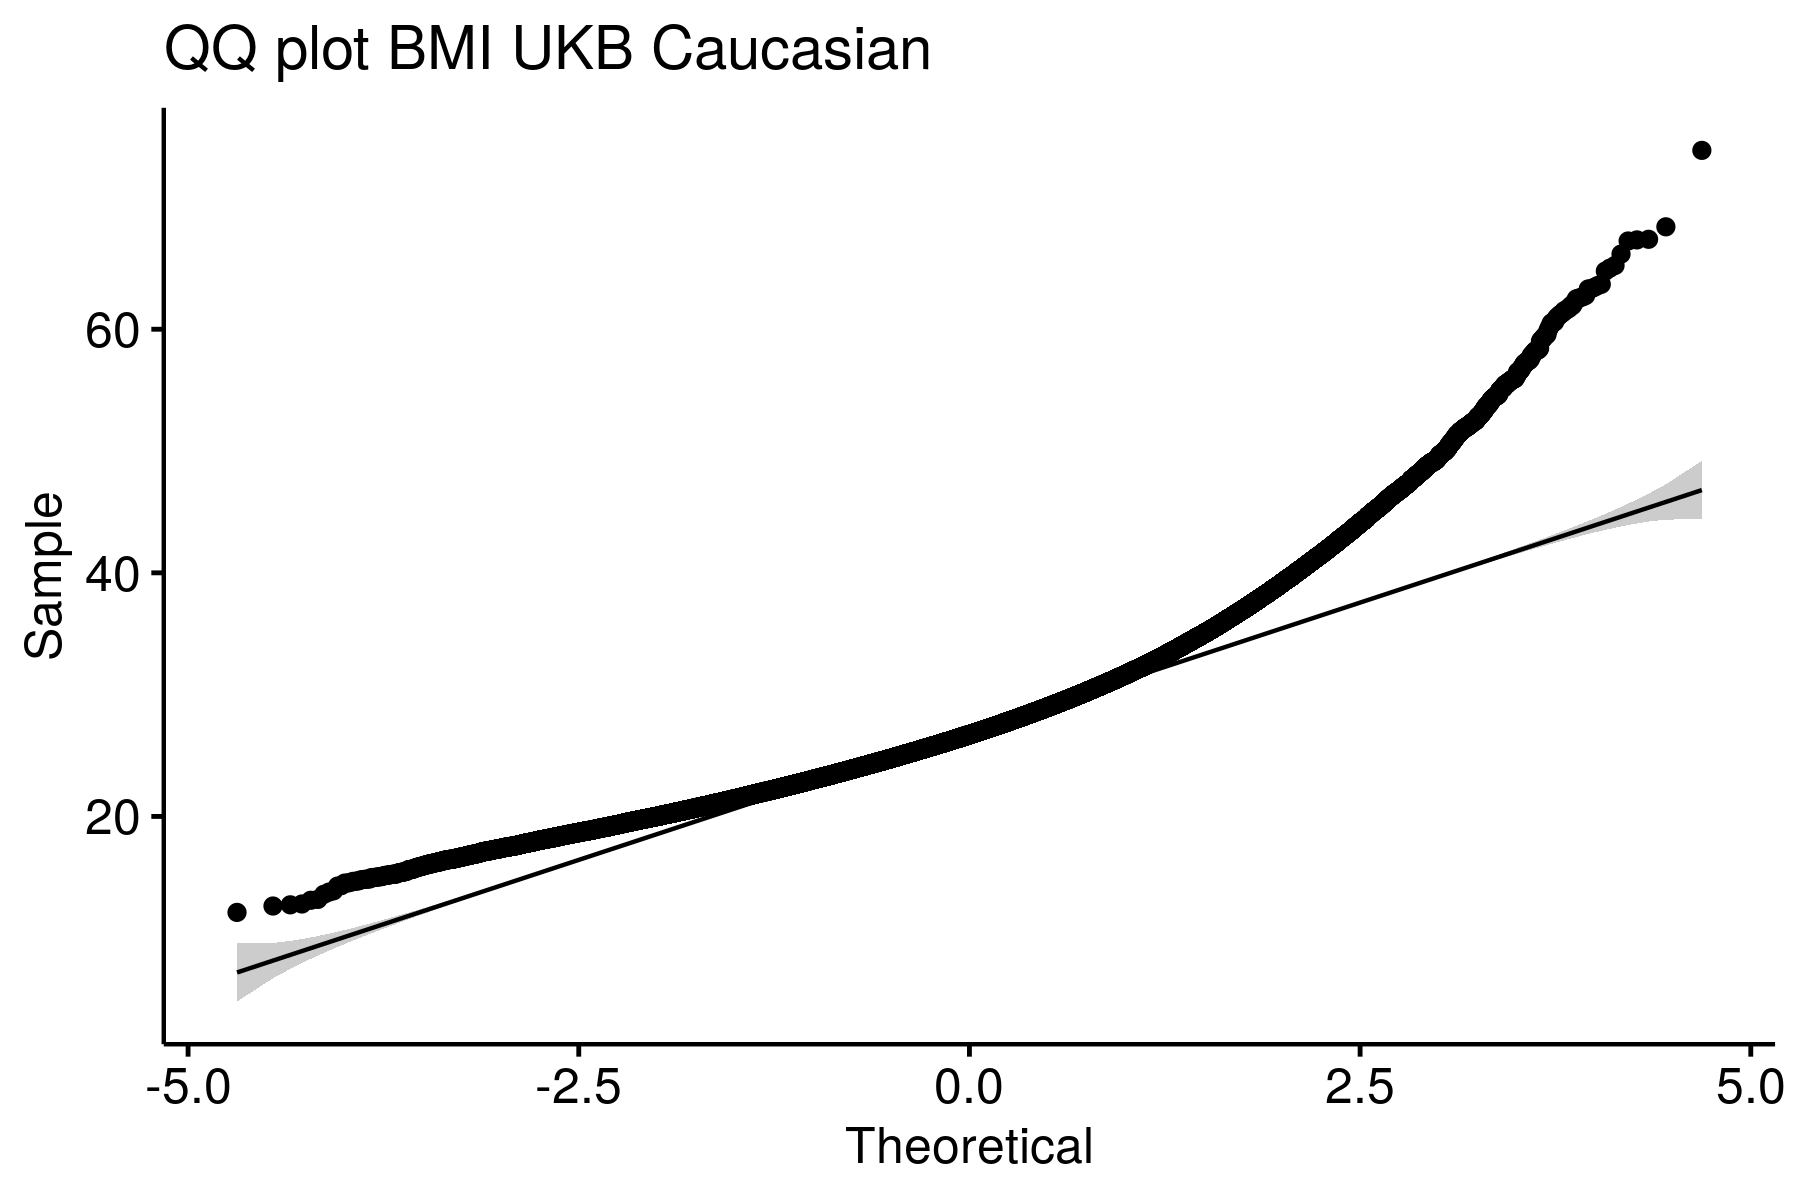

In [49]:
%preview QQplot_BMI_UKB_Caucasian.png --width 50%

In [26]:
waist_circum_qqplot = ggqqplot(df$WAIST, title="QQ plot Waist circumference UKB Caucasian" )
png("QQplot_WAIST_UKB_Caucasian.png", width = 6, height = 4, unit="in", res=300)
print(waist_circum_qqplot)
dev.off()

Warning message:
“Removed 566 rows containing non-finite values (stat_qq).”
Warning message:
“Removed 566 rows containing non-finite values (stat_qq_line).”
Warning message:
“Removed 566 rows containing non-finite values (stat_qq_line).”


png 
  2

> QQplot_WAIST_UKB_Caucasian.png (38.3 KiB):

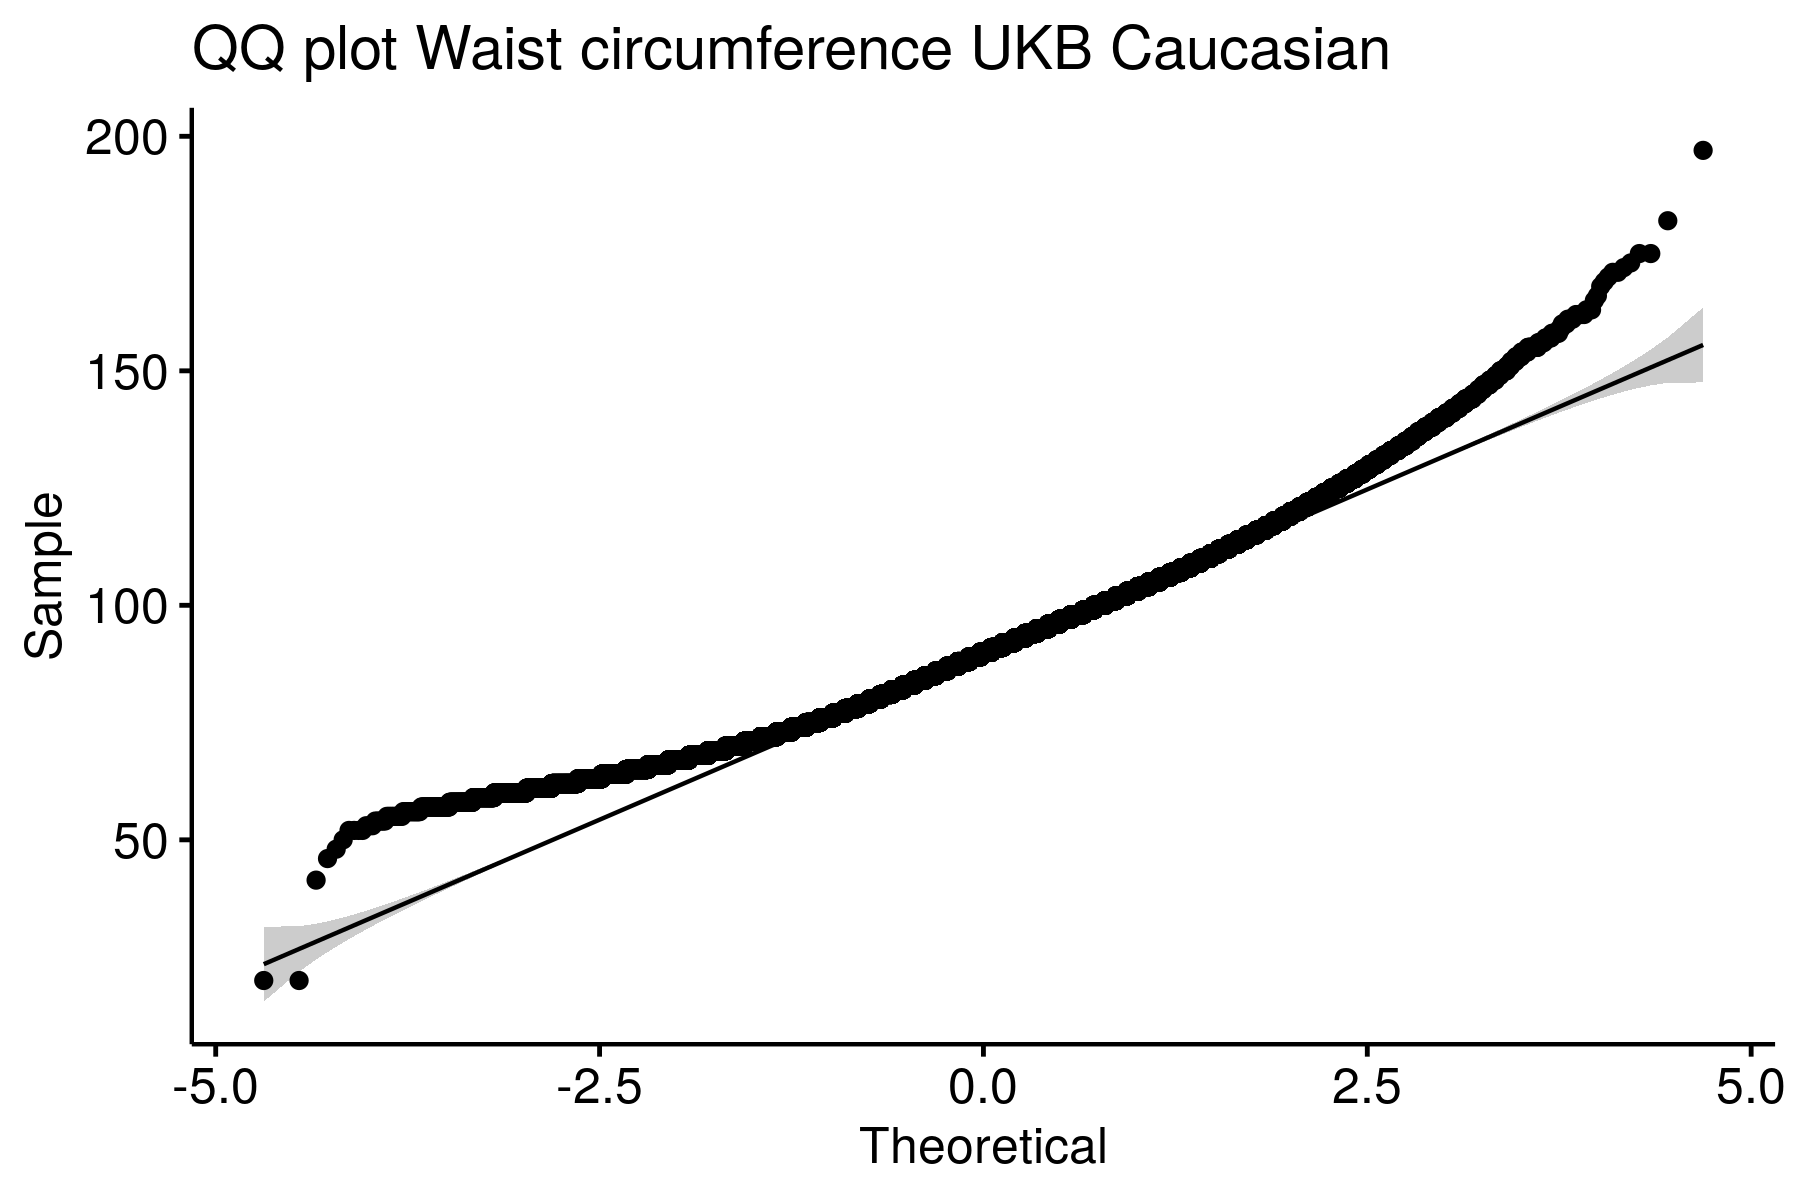

In [50]:
%preview QQplot_WAIST_UKB_Caucasian.png --width 50%

In [27]:
hip_circum_qqplot = ggqqplot(df$HIP, title="QQ plot Hip circumference UKB Caucasian")
png("QQplot_HIP_UKB_Caucasian.png", width = 6, height = 4, unit="in", res=300)
print(hip_circum_qqplot)
dev.off()

Warning message:
“Removed 608 rows containing non-finite values (stat_qq).”
Warning message:
“Removed 608 rows containing non-finite values (stat_qq_line).”
Warning message:
“Removed 608 rows containing non-finite values (stat_qq_line).”


png 
  2

> QQplot_HIP_UKB_Caucasian.png (36.1 KiB):

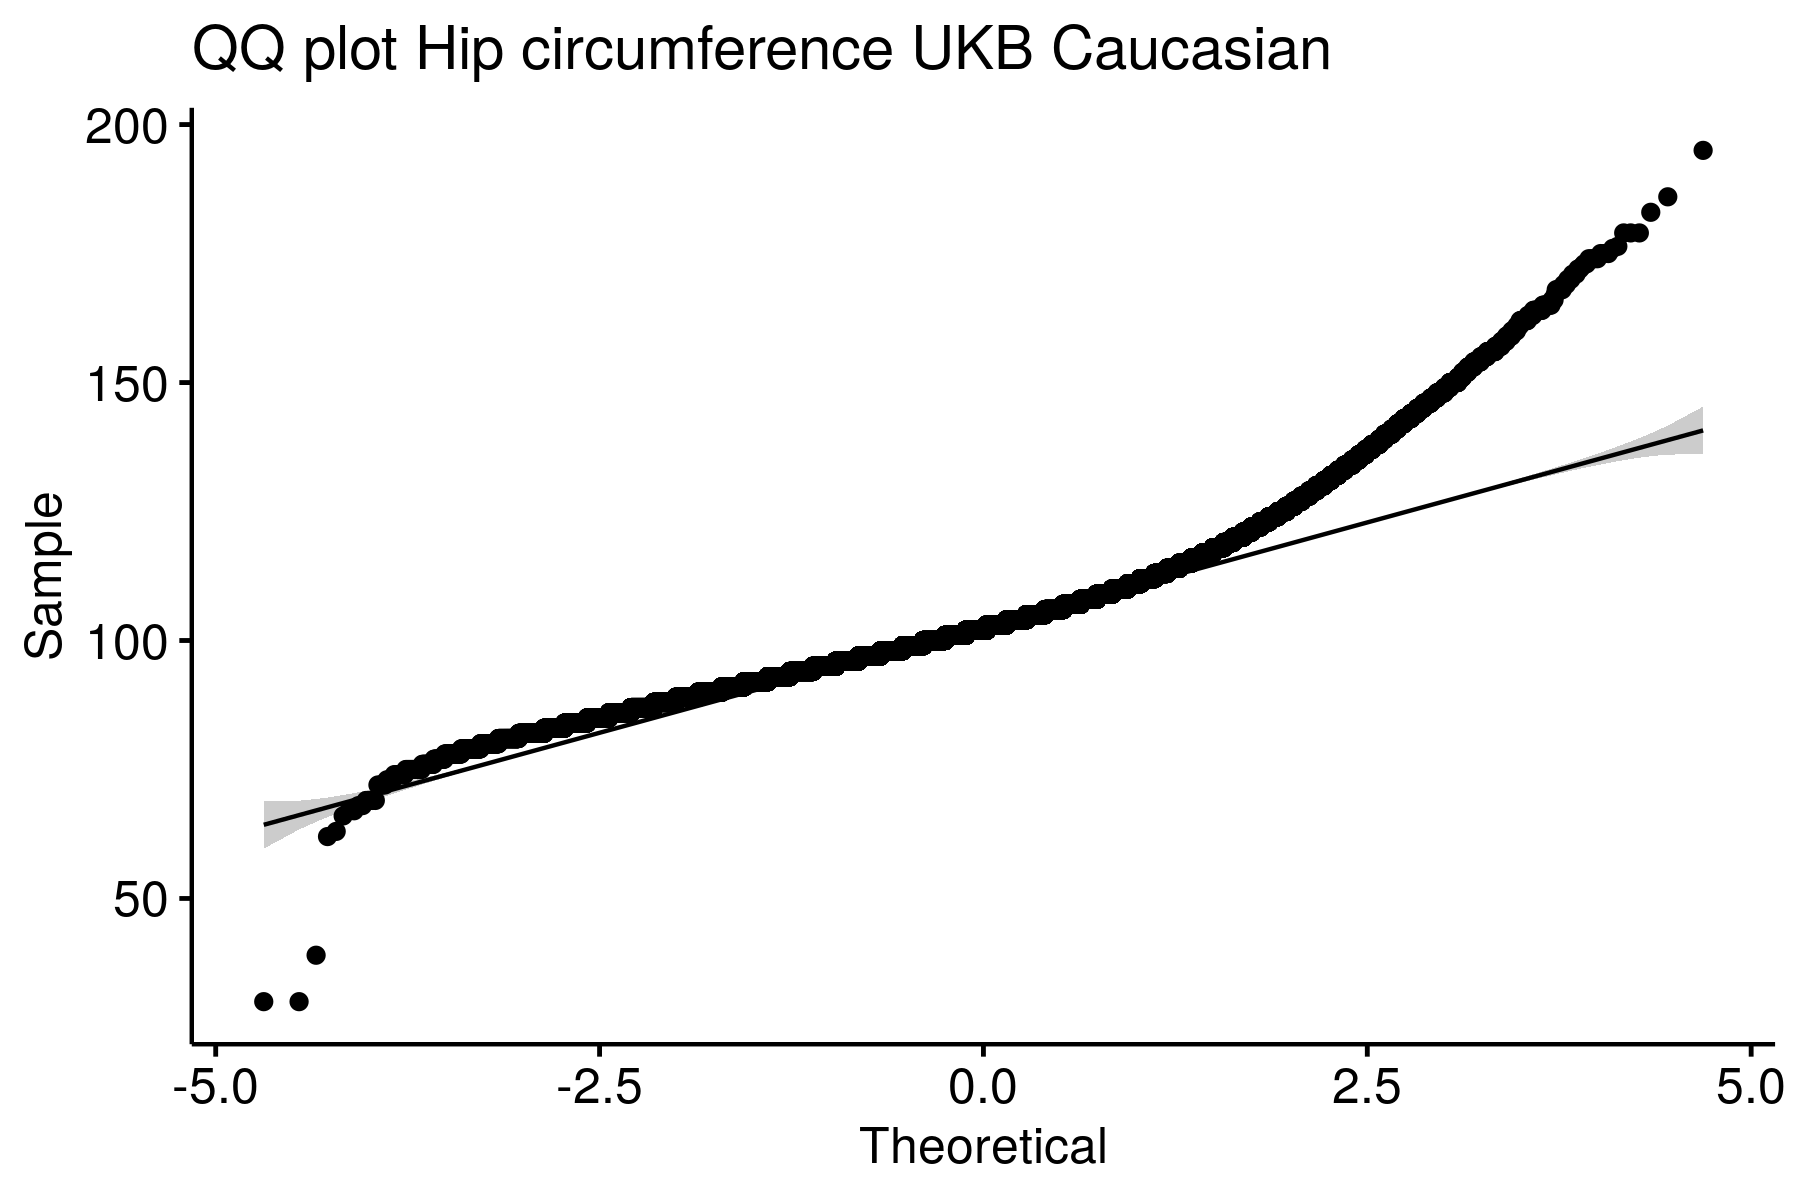

In [51]:
%preview QQplot_HIP_UKB_Caucasian.png --width 50%

In [28]:
whr_qqplot = ggqqplot(df$WHR, title="QQ plot Waist to hip ratio UKB Caucasian")
png("QQplot_WHR_UKB_Caucasian.png", width = 6, height = 4, unit="in", res=300)
print(whr_qqplot)
dev.off()

Warning message:
“Removed 636 rows containing non-finite values (stat_qq).”
Warning message:
“Removed 636 rows containing non-finite values (stat_qq_line).”
Warning message:
“Removed 636 rows containing non-finite values (stat_qq_line).”


png 
  2

> QQplot_WHR_UKB_Caucasian.png (33.7 KiB):

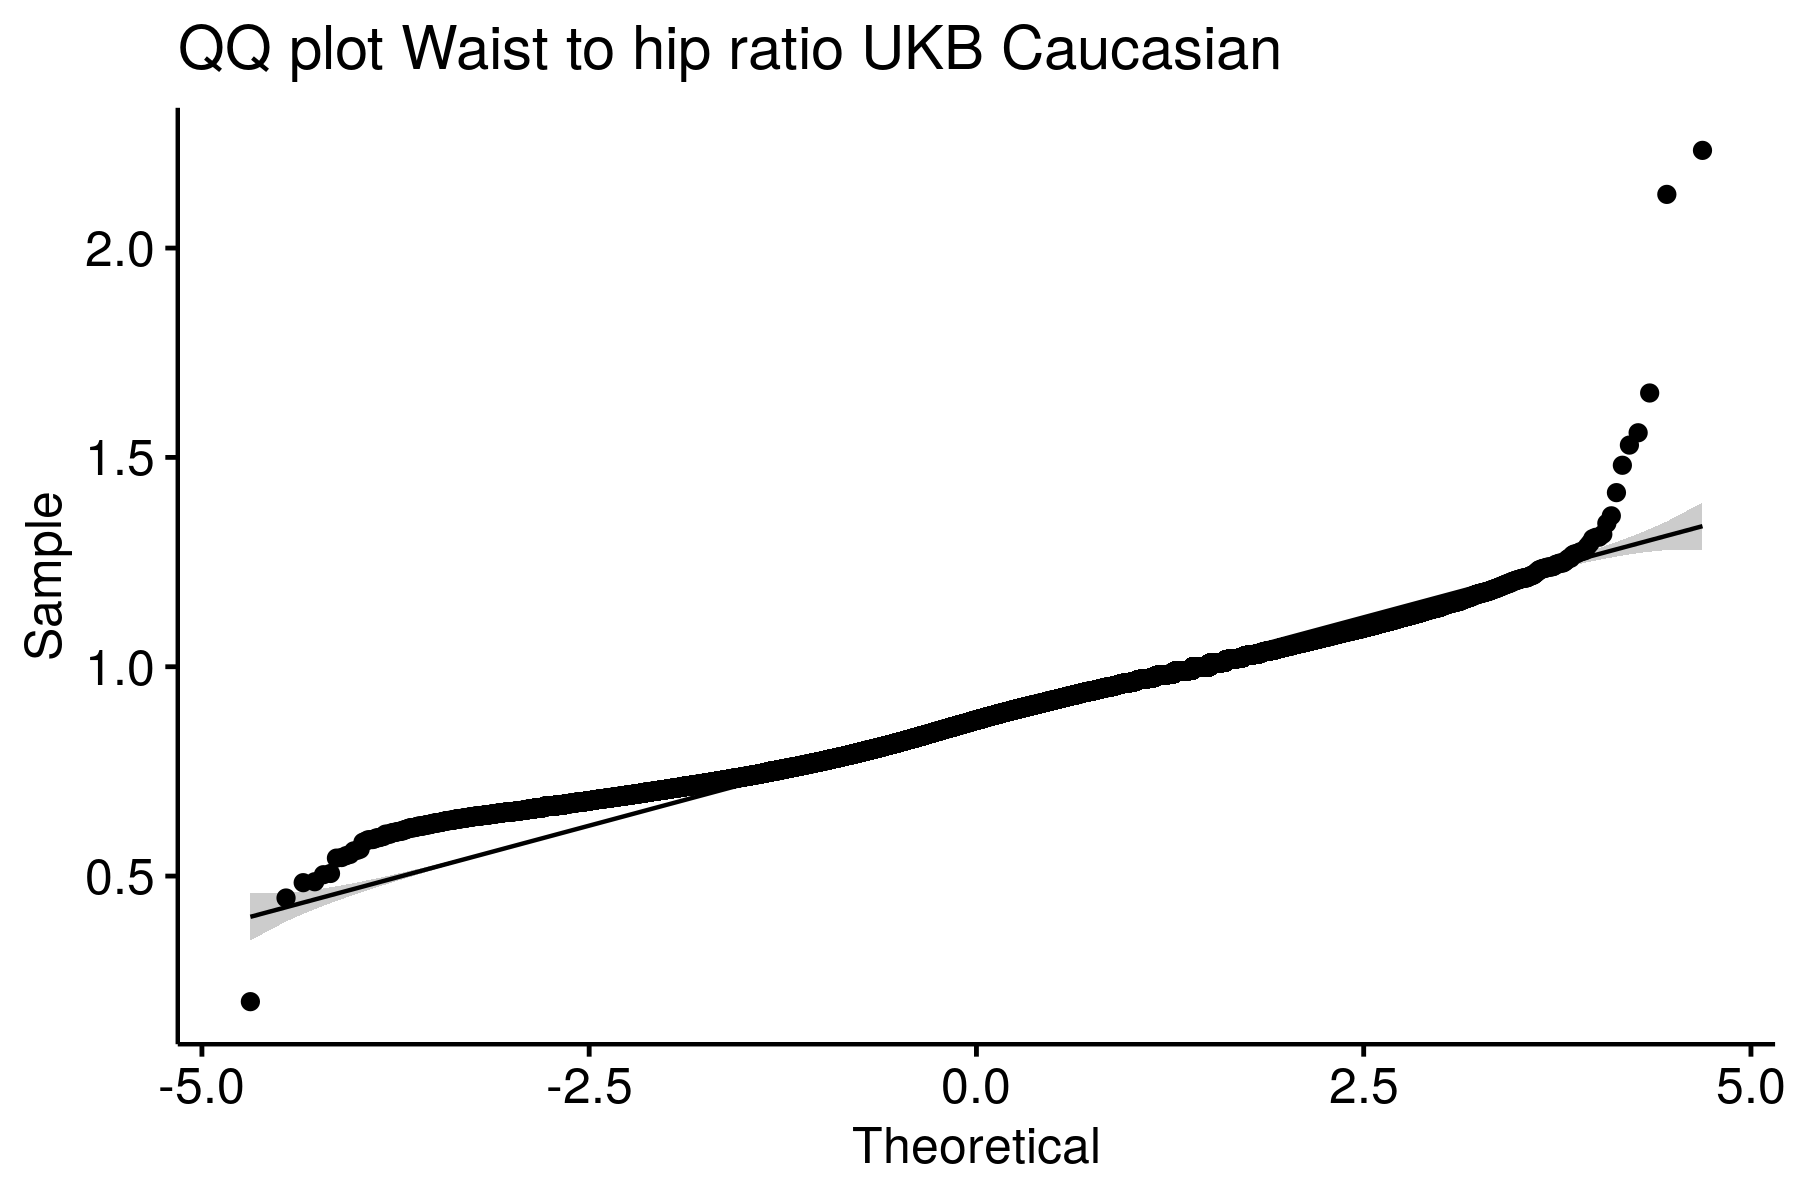

In [52]:
%preview QQplot_WHR_UKB_Caucasian.png --width 50%

In [54]:
# Formal normality tests. They only accept a maximum of 5000 samples
# Regarding the distribution of the qq plot these variables are clearly not normally distributed

shapiro.test(df$BMI)

ERROR: Error in shapiro.test(df$BMI): sample size must be between 3 and 5000


In [56]:
# Perform inverse rank normalization for traits with non-normal distribution
# For this the script requires the removal of missing obervations

summary(df[complete.cases(df$BMI), ] )#Keep only complete rows for BMI column
df_complete_BMI = df[complete.cases(df$BMI), ] # create a dataset with complete cases for BMI
colSums(is.na(df_complete_BMI)) # make sure it did the right thing

df_complete_WAIST = df[complete.cases(df$WAIST), ]
colSums(is.na(df_complete_WAIST))

df_complete_WHR = df[complete.cases(df$WHR), ]
colSums(is.na(df_complete_WHR))

      FID               IID               AGE             SEX        
 Min.   :1000019   Min.   :1000019   Min.   :39.00   Min.   :0.0000  
 1st Qu.:2257130   1st Qu.:2257130   1st Qu.:51.00   1st Qu.:0.0000  
 Median :3514917   Median :3514917   Median :58.00   Median :0.0000  
 Mean   :3514181   Mean   :3514181   Mean   :56.93   Mean   :0.4587  
 3rd Qu.:4770800   3rd Qu.:4770800   3rd Qu.:63.00   3rd Qu.:1.0000  
 Max.   :6025425   Max.   :6025425   Max.   :73.00   Max.   :1.0000  
                                                                     
     ASTHMA            T2D              BMI            WAIST       
 Min.   :0.0000   Min.   :0.0000   Min.   :12.12   Min.   : 20.00  
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:24.14   1st Qu.: 80.00  
 Median :0.0000   Median :0.0000   Median :26.72   Median : 90.00  
 Mean   :0.1322   Mean   :0.0624   Mean   :27.39   Mean   : 90.26  
 3rd Qu.:0.0000   3rd Qu.:0.0000   3rd Qu.:29.84   3rd Qu.: 99.00  
 Max.   :1.0000   Max.   :1.0000

FID    IID    AGE    SEX ASTHMA    T2D    BMI  WAIST    HIP    WHR 
     0      0      0      0      0      0      0     53     52     79

FID    IID    AGE    SEX ASTHMA    T2D    BMI  WAIST    HIP    WHR 
     0      0      0      0      0      0    589      0     70     70

FID    IID    AGE    SEX ASTHMA    T2D    BMI  WAIST    HIP    WHR 
     0      0      0      0      0      0    545      0      0      0

In [57]:
# Now apply rank normalization using library(RNOmni)

z = rankNorm(df_complete_BMI$BMI)

In [58]:
df_complete_BMI$rankNorm_BMI = rankNorm(df_complete_BMI$BMI)
df_complete_WAIST$rankNorm_WAIST = rankNorm(df_complete_WAIST$WAIST)
df_complete_WHR$rankNorm_WHR = rankNorm(df_complete_WHR$WHR)

In [59]:
# Visualize the data

INT_BMI_density_plot = ggplot(df_complete_BMI, aes(x=rankNorm_BMI)) + 
  geom_histogram(aes(y=..density..), 
                 col="black", 
                 fill="white", 
                 alpha = .2) + 
  labs(title="Density plot for INT-BMI", x="rankNorm_BMI") + 
  theme_classic()
png("Density_plot_INT-BMI_UKB_Caucasian.png", width = 6, height = 4, unit="in", res=300)
print(INT_BMI_density_plot)
dev.off()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



png 
  2

In [60]:
INT_BMI_qqplot = ggplot(df_complete_BMI,aes(sample=rankNorm_BMI)) + 
  stat_qq() +
  labs(title="QQ plot for INT-BMI UKB-EUR")+
  theme_classic()
png("QQplot_INT-BMI_UKB_Caucasian.png", width = 6, height = 4, unit="in", res=300)
print(INT_BMI_qqplot)
dev.off()

png 
  2

In [61]:
INT_WAIST_qqplot = ggplot(df_complete_WAIST,aes(sample=rankNorm_WAIST)) + 
  stat_qq() +
  labs(title="QQ plot for INT-WAIST UKB-EUR")+
  theme_classic()
png("QQplot_INT-WAIST_UKB_Caucasian.png", width = 6, height = 4, unit="in", res=300)
print(INT_WAIST_qqplot)
dev.off()

png 
  2

In [62]:
INT_WHR_qqplot = ggplot(df_complete_WHR,aes(sample=rankNorm_WHR)) +
stat_qq() +
  labs(title="QQ plot for INT-WHR UKB-EUR")+
  theme_classic()
png("QQplot_INT-WHR_UKB_Caucasian.png", width = 6, height = 4, unit="in", res=300)
print(INT_WHR_qqplot)
dev.off()

png 
  2

In [63]:
# Write new dataframe to file

write.table(df_complete_BMI, file = "UKB_caucasians_BMIwaisthip_AsthmaAndT2D_INT-BMI_withagesex_041720", append = FALSE, sep = " ", dec = ".",
            row.names = FALSE, col.names = TRUE, quote=FALSE)

write.table(df_complete_WHR, file = "UKB_caucasians_BMIwaisthip_AsthmaAndT2D_INT-WHR_withagesex_042020", append = FALSE, sep = " ", dec = ".",
            row.names = FALSE, col.names = TRUE, quote=FALSE)

write.table(df_complete_WAIST, file = "UKB_caucasians_BMIwaisthip_AsthmaAndT2D_INT-WAIST_withagesex_042020", append = FALSE, sep = " ", dec = ".",
            row.names = FALSE, col.names = TRUE, quote=FALSE)


Call:
glm(formula = BMI ~ AGE + factor(SEX), data = df_complete_BMI)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-15.282   -3.227   -0.740    2.383   48.031  

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.548e+01  5.680e-02  448.63   <2e-16 ***
AGE          2.718e-02  9.832e-04   27.65   <2e-16 ***
factor(SEX)1 7.892e-01  1.577e-02   50.03   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 22.24974)

    Null deviance: 8094233  on 360451  degrees of freedom
Residual deviance: 8019895  on 360449  degrees of freedom
AIC: 2141165

Number of Fisher Scoring iterations: 2


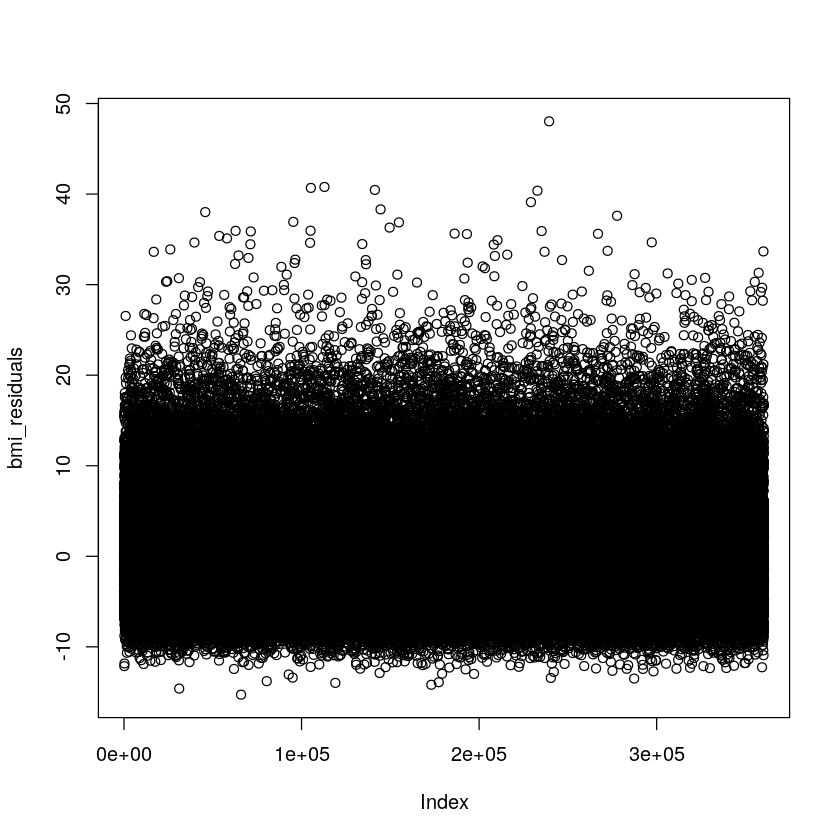

In [74]:
# GLM: apply generalized linear models to obtain residuals

bmi_glm <- glm(BMI ~ AGE + factor(SEX), data=df_complete_BMI)
summary(bmi_glm)
bmi_residuals = residuals.glm(bmi_glm)
plot(bmi_residuals)

In [69]:
waist_glm <- glm(WAIST ~ BMI + AGE + factor(SEX), data=df)
summary(waist_glm)


Call:
glm(formula = WAIST ~ BMI + AGE + factor(SEX), data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-63.336   -3.700   -0.127    3.604   76.103  

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  19.030517   0.085435  222.75   <2e-16 ***
BMI           2.198827   0.002007 1095.54   <2e-16 ***
AGE           0.107379   0.001186   90.56   <2e-16 ***
factor(SEX)1 10.648302   0.019068  558.44   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 32.28917)

    Null deviance: 64913513  on 360398  degrees of freedom
Residual deviance: 11636855  on 360395  degrees of freedom
  (1155 observations deleted due to missingness)
AIC: 2275064

Number of Fisher Scoring iterations: 2


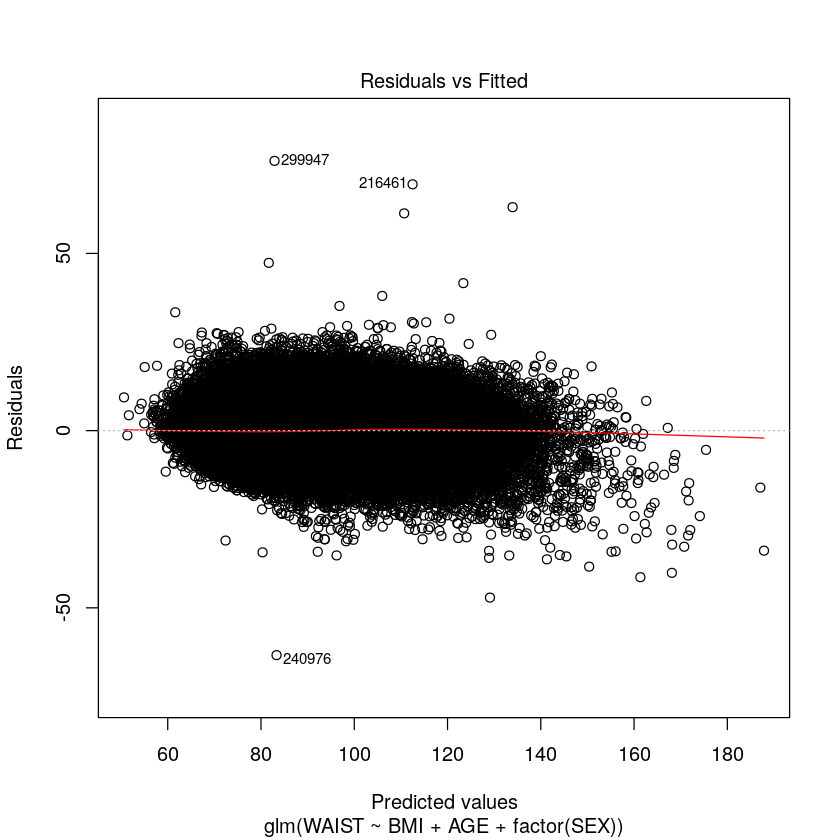

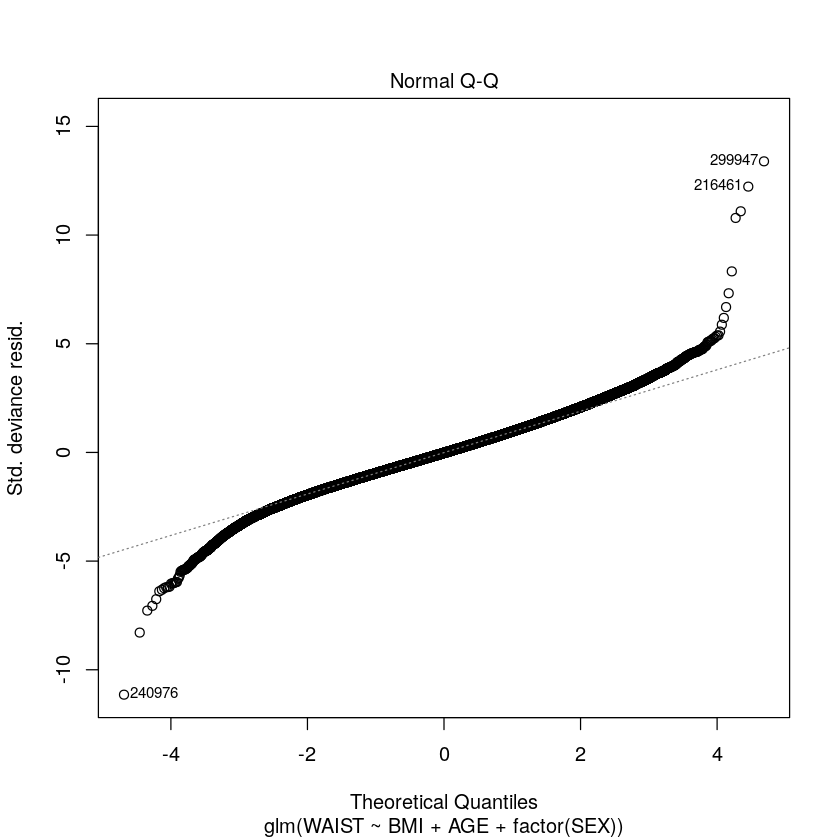

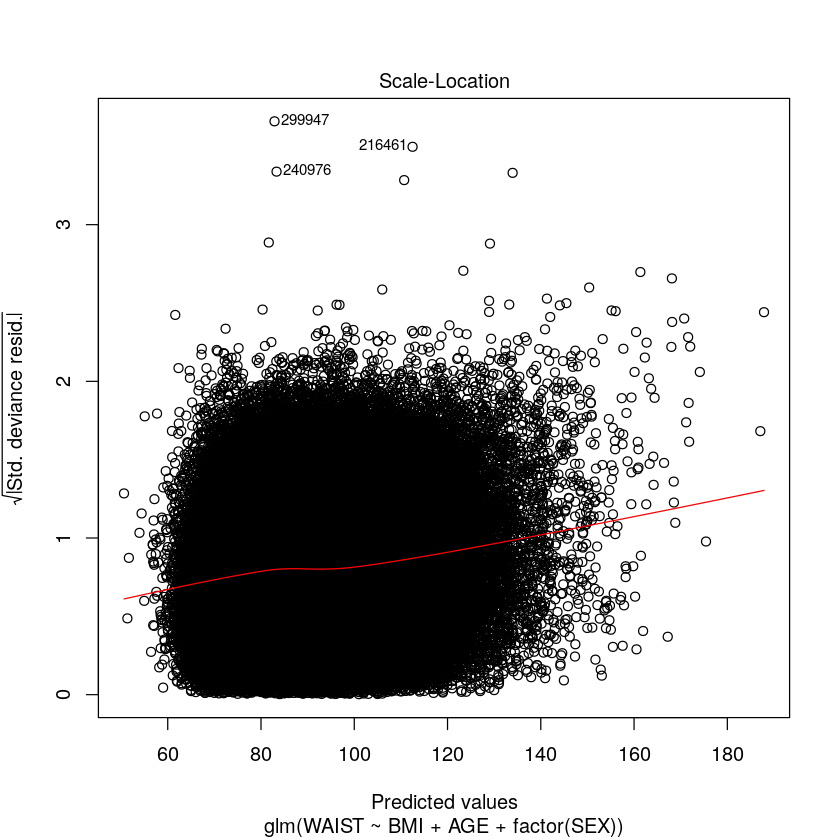

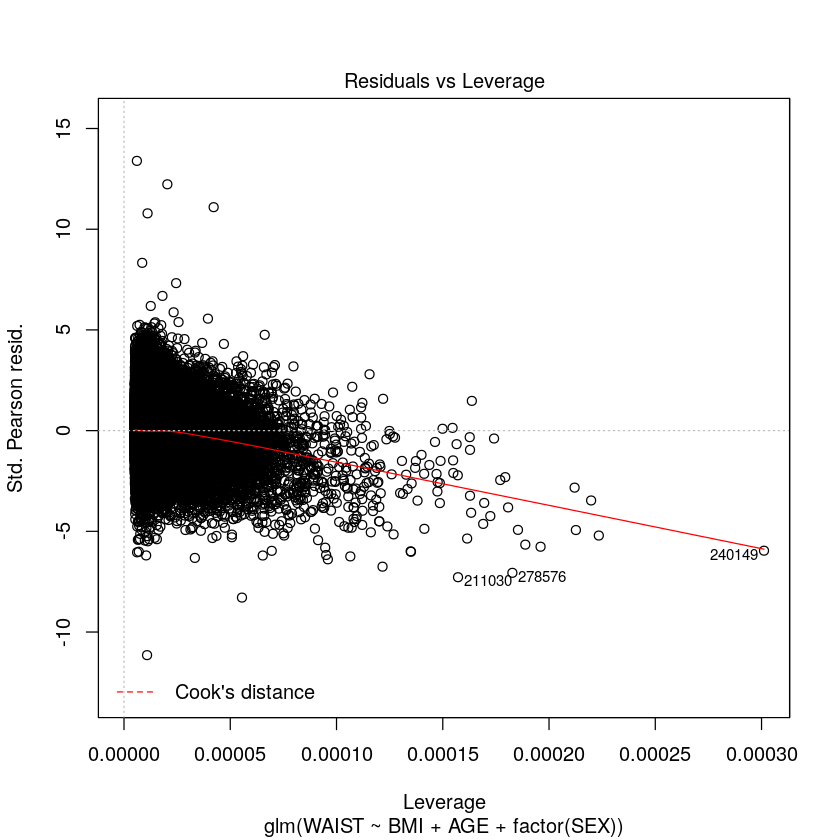

In [70]:
plot(waist_glm)

In [71]:
whr_glm  <- glm(WHR ~ AGE + factor(SEX), data=df)
summary(whr_glm)


Call:
glm(formula = WHR ~ AGE + factor(SEX), data = df)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.73559  -0.04547  -0.00332   0.04172   1.31729  

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.311e-01  7.987e-04   915.5   <2e-16 ***
AGE          1.504e-03  1.382e-05   108.8   <2e-16 ***
factor(SEX)1 1.187e-01  2.217e-04   535.5   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 0.00440317)

    Null deviance: 2918.1  on 360917  degrees of freedom
Residual deviance: 1589.2  on 360915  degrees of freedom
  (636 observations deleted due to missingness)
AIC: -933890

Number of Fisher Scoring iterations: 2


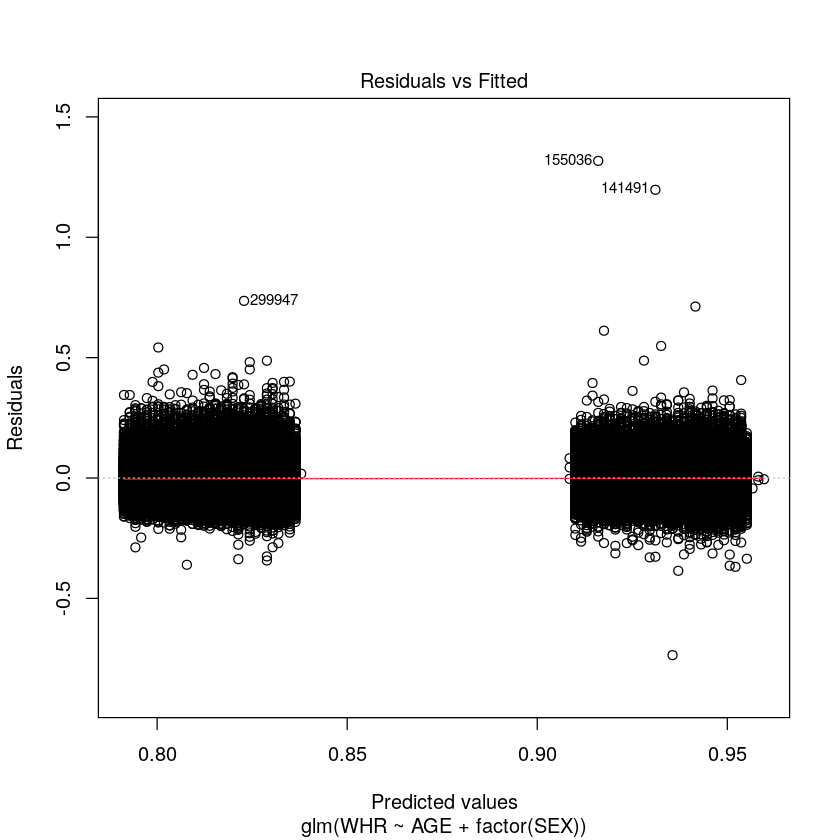

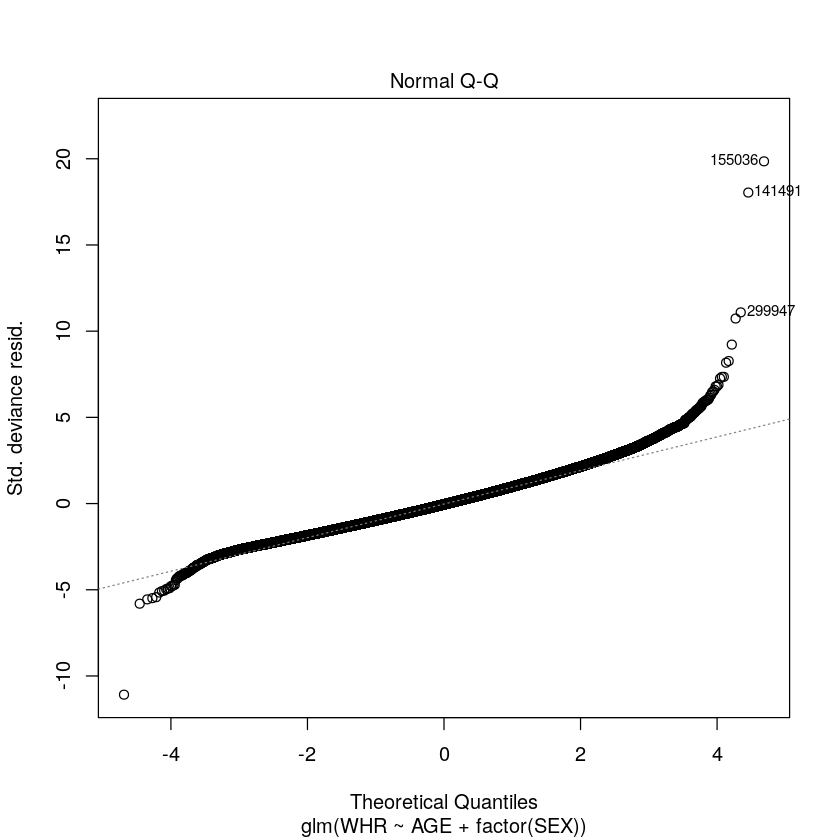

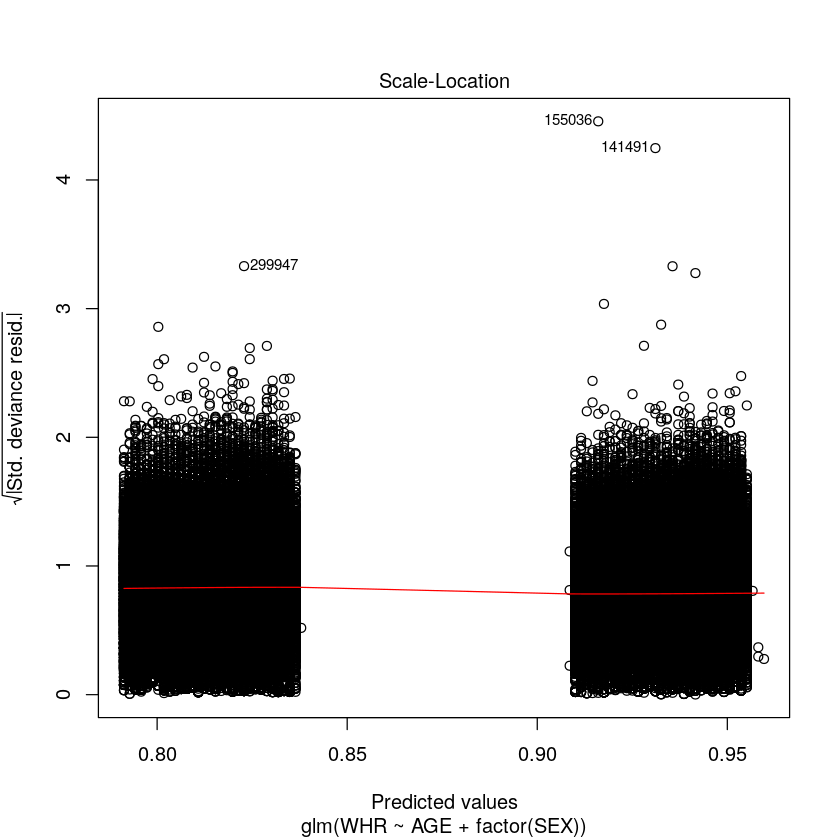

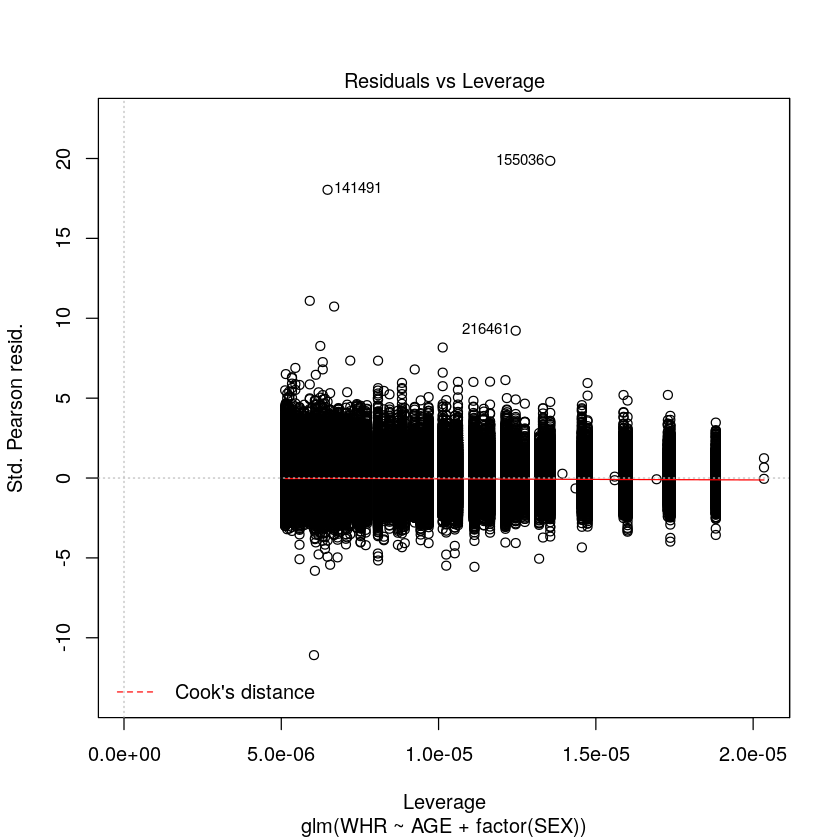

In [72]:
plot(whr_glm)

In [ ]:
# To plot residuals from library car
# install.packages("car")
library(car)
residualPlots(bmi_glm)